## import Library

In [1]:
import bs4 as bs
import urllib.request
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import joblib
from xgboost import XGBRegressor

# Data Collection

In [6]:
def init_soup(url):
    hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
           'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
           'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
           'Accept-Encoding': 'none',
           'Accept-Language': 'en-US,en;q=0.8',
           'Connection': 'keep-alive'}
    request=urllib.request.Request(url,None,hdr)
    source = urllib.request.urlopen(request).read()
    soup = bs.BeautifulSoup(source,'lxml')
    return soup

def store_url(url):
    soup = init_soup(url)
    links = soup.find_all("a", {"class": "gtm-ad-item"})
#     print(len(links))
    list = []
    for link in links:
#         print(link['href'])
        list.append("https://bikroy.com"+link['href'])
    return list



def store_data(url):
    soup = init_soup(url)
    
    title = soup.find("h1",{"class": "title--3s1R8"})
    price = soup.find("div",{"class": "amount--3NTpl"})
    links = soup.find_all("div", {"class": "value--1lKHt"})
    list = []
    list.append(url)
    list.append(title.text)
    
    if(len(links)==7):
        list.append(links[0].text)
        list.append(links[1].text)
        list.append(links[2].text)
        list.append(".")
        list.append(links[3].text)
        list.append(links[4].text)
        list.append(links[5].text)
        list.append(links[6].text)
        
    elif(len(links)==8):
        list.append(links[0].text)
        list.append(links[1].text)
        list.append(links[2].text)
        list.append(links[3].text)
        list.append(links[4].text)
        list.append(links[5].text)
        list.append(links[6].text)
        list.append(links[7].text)
    list.append(price.text)
        
    return list

def call_url_store():
    all_url = []
    for x in range(59,100):
        new_urls = store_url("https://bikroy.com/en/ads/bangladesh/motorbikes-scooters?sort=date&order=desc&buy_now=0&urgent=0&page="+(str)(x))
        all_url.extend(new_urls)
        print(x,end=' ')
    
    
    df = pd.DataFrame({'col':all_url})
    df.to_csv('file.csv')
    print("OK")

### Test Function of scrapping

In [7]:
store_data("https://bikroy.com/en/ad/yamaha-fazer-2017-for-sale-dhaka-587")

['https://bikroy.com/en/ad/bajaj-pulsar-2019-for-sale-dhaka-713',
 'Bajaj Pulsar . 2019',
 'Motorcycle',
 'Bajaj',
 'Pulsar',
 '.',
 '2019',
 'Used',
 '150 cc',
 '4,100 km',
 'Tk 167,500']

In [259]:
def save_data():
    all_data = []
    url_file = pd.read_csv("file.csv")
    error_file = open('error_file.txt','w')
    url_list = url_file['col'].tolist()
    cnt = 0
    for url in range(1,20000):
        try:
            lst = store_data(url_list[url])
            all_data.append(lst)
            print(url, end=' ')
        except:
            error_file.write(url_list[url]+"\n")
    error_file.close()
    df = pd.DataFrame(all_data)
    df.columns =['url','name','bike','brand','model','Trim / Edition','Year of Manufacture','Condition','Engine capacity','Kilometers run','price']
    df.to_csv('dataset2.csv',index=False)
        
    

save_data()

Store data successfully


## Data Clenning

In [385]:
df = pd.read_csv('dataset.csv')

df.head()

,url,name,bike,brand,model,Trim / Edition,Year of Manufacture,Condition,Engine capacity,Kilometers run,price
0,https://bikroy.com/en/ad/aprilia-gpr-150-as-li...,Aprilia GPR 150 As-Like New Bike 2021,Motorcycle,Aprilia,GPR 150,As-Like New Bike,2021,Used,150 cc,"2,800 km","Tk 197,000"
1,https://bikroy.com/en/ad/bajaj-aspire-phruk-mo...,Bajaj Aspire ফরুক মোটরস 2017,Motorcycle,Bajaj,Aspire,NaN,2017,Used,150 cc,"22,000 km","Tk 122,000"
2,https://bikroy.com/en/ad/bajaj-ct-100-1-2011-f...,Bajaj CT 100 . 2011,Motorcycle,Bajaj,CT 100,.,2011,Used,100 cc,"26,759 km","Tk 65,000"
3,https://bikroy.com/en/ad/bajaj-discover-100cc-...,Bajaj Discover 100cc 2017,Motorcycle,Bajaj,Discover,100cc,2017,Used,100 cc,"22,500 km","Tk 37,000"
4,https://bikroy.com/en/ad/bajaj-discover-phruk-...,Bajaj Discover ফরুক মোটরস 2015,Motorcycle,Bajaj,Discover,NaN,2015,Used,100 cc,"33,000 km","Tk 58,000"


In [386]:

df.describe()

,Year of Manufacture
count,2063.000000
mean,2016.267087
std,5.574286
min,1972.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2023.000000


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  2063 non-null   object
 1   name                 2063 non-null   object
 2   bike                 2063 non-null   object
 3   brand                2063 non-null   object
 4   model                2063 non-null   object
 5   Trim / Edition       2028 non-null   object
 6   Year of Manufacture  2063 non-null   int64 
 7   Condition            2063 non-null   object
 8   Engine capacity      2063 non-null   object
 9   Kilometers run       2063 non-null   object
 10  price                2063 non-null   object
dtypes: int64(1), object(10)
memory usage: 177.4+ KB


In [388]:
df.shape

(2063, 11)

In [389]:
df.drop(['url','bike','name','Trim / Edition','Condition'],axis=1,inplace=True)

In [390]:
df.head()

,brand,model,Year of Manufacture,Engine capacity,Kilometers run,price
0,Aprilia,GPR 150,2021,150 cc,"2,800 km","Tk 197,000"
1,Bajaj,Aspire,2017,150 cc,"22,000 km","Tk 122,000"
2,Bajaj,CT 100,2011,100 cc,"26,759 km","Tk 65,000"
3,Bajaj,Discover,2017,100 cc,"22,500 km","Tk 37,000"
4,Bajaj,Discover,2015,100 cc,"33,000 km","Tk 58,000"


## Co -relation matrics

In [391]:
def corr_heatmap(data_frame, size=11):
  # Getting correlation using Pandas
  correlation = data_frame.corr()

  # Dividing the plot into subplots for increasing size of plots
  fig, heatmap = plt.subplots(figsize=(size, size))

  # Plotting the correlation heatmap
  heatmap.matshow(correlation)

  # Adding xticks and yticks
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)

  # Displaying the graph
  plt.show()


## remove unwanted carecter from price and capicity and price collumn 

In [392]:
def shape_power(st):
    st = st.strip()
    st = st[:-2]
    ab = st.split(',')
    value = ''.join(ab)
    return int(value)
def shape_run(st):
    st = st.strip()
    st = st[:-3]
    ab = st.split(',')
    value = ''.join(ab)
    return int(value)

def shape_price(st):
    st = st.strip()
    st = st[3:]
    ab = st.split(',')
    value = ''.join(ab)
    return int(value)



In [393]:
df['Engine capacity'] = df['Engine capacity'].apply(shape_power)
df['Kilometers run'] = df['Kilometers run'].apply(shape_run)
df['price'] = df['price'].apply(shape_price)

In [394]:
df.head()

,brand,model,Year of Manufacture,Engine capacity,Kilometers run,price
0,Aprilia,GPR 150,2021,150,2800,197000
1,Bajaj,Aspire,2017,150,22000,122000
2,Bajaj,CT 100,2011,100,26759,65000
3,Bajaj,Discover,2017,100,22500,37000
4,Bajaj,Discover,2015,100,33000,58000


### Make bike brand = others Who's elements is less than 10

In [395]:
df['brand'].value_counts()

Bajaj              459
TVS                353
Yamaha             288
Hero               246
Suzuki             194
Honda              149
Runner              84
Walton              38
Keeway              25
Other brand         18
H Power             17
Mahindra            14
LML                 13
Dayun               13
Dayang              13
Lifan               12
Roadmaster          11
Regal Raptor        11
Dayang Runner       10
Haojue               8
Singer               5
Victor-R             5
Freedom              5
Aprilia              5
Xingfu               5
Zaara                4
Zongshen             4
Emma                 4
Benelli              4
SYM                  4
Pegasus              4
KTM                  3
Beetle Bolt          3
ZNEN                 3
Freedom Runner       3
Power                3
Taro                 3
Hyosung              2
Jialing              2
Green Tiger          2
PHP                  2
Haojin               2
Butterfly            1
Kinlon     

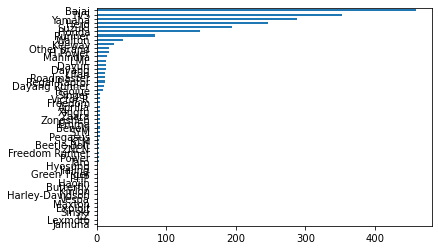

In [396]:
df['brand'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

In [397]:
brands = df['brand'].value_counts()
bike_brands_less_than_10 = brands[brands<=10]
bike_brands_less_than_10

Dayang Runner      10
Haojue              8
Singer              5
Victor-R            5
Freedom             5
Aprilia             5
Xingfu              5
Zaara               4
Zongshen            4
Emma                4
Benelli             4
SYM                 4
Pegasus             4
KTM                 3
Beetle Bolt         3
ZNEN                3
Freedom Runner      3
Power               3
Taro                3
Hyosung             2
Jialing             2
Green Tiger         2
PHP                 2
Haojin              2
Butterfly           1
Kinlon              1
Harley-Davidson     1
Vespa               1
Maxton              1
Exploit             1
Sinski              1
CZ                  1
Lexmoto             1
Jamuna              1
Name: brand, dtype: int64

In [398]:
print("Other brands total",sum(bike_brands_less_than_10))

Other brands total 105


In [399]:
others = bike_brands_less_than_10.keys()
others

Index(['Dayang Runner', 'Haojue', 'Singer', 'Victor-R', 'Freedom', 'Aprilia',
       'Xingfu', 'Zaara', 'Zongshen', 'Emma', 'Benelli', 'SYM', 'Pegasus',
       'KTM', 'Beetle Bolt', 'ZNEN', 'Freedom Runner', 'Power', 'Taro',
       'Hyosung', 'Jialing', 'Green Tiger', 'PHP', 'Haojin', 'Butterfly',
       'Kinlon', 'Harley-Davidson', 'Vespa', 'Maxton', 'Exploit', 'Sinski',
       'CZ', 'Lexmoto', 'Jamuna'],
      dtype='object')

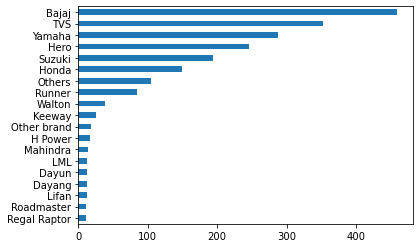

In [400]:
df['brand'].replace(others,"Others",inplace=True)
df['brand'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

## Make bike Model = 'Other model' Which element is less than 10

In [276]:
df['model'].value_counts()

Pulsar           262
Apache RTR       214
Other Model      168
Gixxer           143
Discover         116
                ... 
SXL 125            1
Magnet 100         1
Starcity Plus      1
K Light 150        1
Arro               1
Name: model, Length: 153, dtype: int64

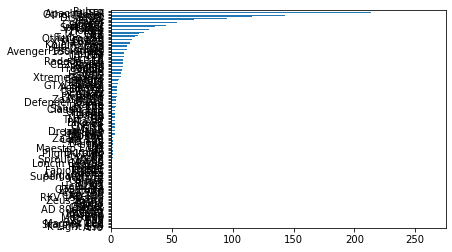

In [277]:
df['model'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

In [278]:
model = df['model'].value_counts()
bike_model_less_than_10 = model[model<=10]
bike_model_less_than_10

MT 15            10
Radeon 110       10
Passion          10
CBZ Xtrem        10
Bullet           10
                 ..
SXL 125           1
Magnet 100        1
Starcity Plus     1
K Light 150       1
Arro              1
Name: model, Length: 119, dtype: int64

In [279]:
print("Other brands total",sum(bike_model_less_than_10))

Other brands total 366


In [280]:
others = bike_model_less_than_10.keys()
others

Index(['MT 15', 'Radeon 110', 'Passion', 'CBZ Xtrem', 'Bullet', 'Rapido',
       'Freedom', 'Cruize', 'KPR', 'Shine',
       ...
       'Aspire', 'DY100', 'Merkaba', 'Ray', 'CG 125', 'SXL 125', 'Magnet 100',
       'Starcity Plus', 'K Light 150', 'Arro'],
      dtype='object', length=119)

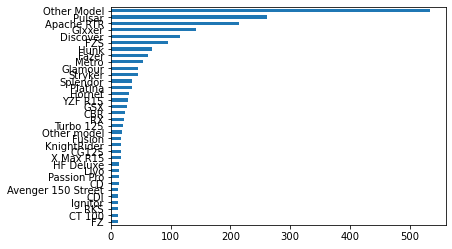

In [281]:
df['model'].replace(others,"Other Model",inplace=True)
df['model'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

In [350]:
df.head()

,brand,model,Year of Manufacture,Engine capacity,Kilometers run,price
0,Aprilia,GPR 150,2021,150,2800,197000
1,Bajaj,Aspire,2017,150,22000,122000
2,Bajaj,CT 100,2011,100,26759,65000
3,Bajaj,Discover,2017,100,22500,37000
4,Bajaj,Discover,2015,100,33000,58000


## Combined The Brand and Model Column 

In [401]:
df_new = df
df_new['brand_model']=df['brand'].astype(str)+' '+df['model']

In [402]:
df_new.head()

,brand,model,Year of Manufacture,Engine capacity,Kilometers run,price,brand_model
0,Others,GPR 150,2021,150,2800,197000,Others GPR 150
1,Bajaj,Aspire,2017,150,22000,122000,Bajaj Aspire
2,Bajaj,CT 100,2011,100,26759,65000,Bajaj CT 100
3,Bajaj,Discover,2017,100,22500,37000,Bajaj Discover
4,Bajaj,Discover,2015,100,33000,58000,Bajaj Discover


In [403]:
df_new.drop(['brand','model'],axis=1,inplace=True)

In [404]:
df_new.head()

,Year of Manufacture,Engine capacity,Kilometers run,price,brand_model
0,2021,150,2800,197000,Others GPR 150
1,2017,150,22000,122000,Bajaj Aspire
2,2011,100,26759,65000,Bajaj CT 100
3,2017,100,22500,37000,Bajaj Discover
4,2015,100,33000,58000,Bajaj Discover


### Drop Some incorrect Data

In [405]:
df_filtered = df[(df['Engine capacity'] > 79) & (df['Engine capacity'] < 201)]

In [406]:
df_filtered.head()

,Year of Manufacture,Engine capacity,Kilometers run,price,brand_model
0,2021,150,2800,197000,Others GPR 150
1,2017,150,22000,122000,Bajaj Aspire
2,2011,100,26759,65000,Bajaj CT 100
3,2017,100,22500,37000,Bajaj Discover
4,2015,100,33000,58000,Bajaj Discover


In [407]:
df.shape,df_filtered.shape

((2063, 5), (2036, 5))

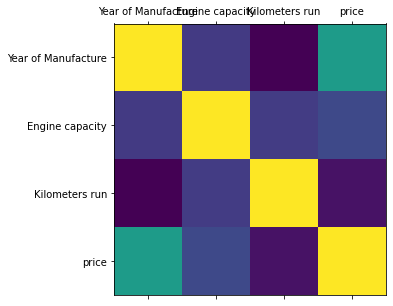

In [408]:
corr_heatmap(df,5)

# Feature Engineering

## One Hot Encoding

In [409]:
cols_to_encode = ['brand_model']
dummies = pd.get_dummies(df[cols_to_encode],drop_first=True)
dummies.sample(10)

,brand_model_Bajaj Avenger 150 Street,brand_model_Bajaj Boxer,brand_model_Bajaj CT 100,brand_model_Bajaj Caliber,brand_model_Bajaj Chetak,brand_model_Bajaj Discover,brand_model_Bajaj Other Model,brand_model_Bajaj Platina,brand_model_Bajaj Pulsar,brand_model_Bajaj V15,...,brand_model_Yamaha M-SLAZ,brand_model_Yamaha MT 15,brand_model_Yamaha Other Model,brand_model_Yamaha RX,brand_model_Yamaha Ray,brand_model_Yamaha SZ RR,brand_model_Yamaha Saluto,brand_model_Yamaha Saluto 125,brand_model_Yamaha X Max R15,brand_model_Yamaha YZF R15
1865,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1608,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Scaling

In [410]:
cols_to_scale = ['Engine capacity','Kilometers run','Year of Manufacture']
scale = MinMaxScaler()
scalled = scale.fit_transform(df[cols_to_scale])

In [411]:
i = 0
for col in cols_to_scale:
    df[col] = scalled[:,i]
    i += 1

In [412]:
df.head()

,Year of Manufacture,Engine capacity,Kilometers run,price,brand_model
0,0.960784,0.014803,0.002800,197000,Others GPR 150
1,0.882353,0.014803,0.022000,122000,Bajaj Aspire
2,0.764706,0.009802,0.026759,65000,Bajaj CT 100
3,0.882353,0.009802,0.022500,37000,Bajaj Discover
4,0.843137,0.009802,0.033000,58000,Bajaj Discover


In [413]:
df.drop(cols_to_encode,axis=1,inplace=True)
df.head()

,Year of Manufacture,Engine capacity,Kilometers run,price
0,0.960784,0.014803,0.002800,197000
1,0.882353,0.014803,0.022000,122000
2,0.764706,0.009802,0.026759,65000
3,0.882353,0.009802,0.022500,37000
4,0.843137,0.009802,0.033000,58000


In [414]:
new_df = pd.concat([dummies,df],axis=1)
new_df.shape

(2063, 175)

In [415]:
new_df.head()

,brand_model_Bajaj Avenger 150 Street,brand_model_Bajaj Boxer,brand_model_Bajaj CT 100,brand_model_Bajaj Caliber,brand_model_Bajaj Chetak,brand_model_Bajaj Discover,brand_model_Bajaj Other Model,brand_model_Bajaj Platina,brand_model_Bajaj Pulsar,brand_model_Bajaj V15,...,brand_model_Yamaha Ray,brand_model_Yamaha SZ RR,brand_model_Yamaha Saluto,brand_model_Yamaha Saluto 125,brand_model_Yamaha X Max R15,brand_model_Yamaha YZF R15,Year of Manufacture,Engine capacity,Kilometers run,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.960784,0.014803,0.002800,197000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.882353,0.014803,0.022000,122000
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.764706,0.009802,0.026759,65000
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.882353,0.009802,0.022500,37000
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.843137,0.009802,0.033000,58000


In [416]:
sum(new_df.isna().sum())

0

# Splitting and Training data

In [417]:
x ,y = new_df.drop(['price'],axis=1), new_df['price']
x.shape, y.shape

((2063, 174), (2063,))

In [418]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [419]:
x_train.shape, x_test.shape

((1444, 174), (619, 174))

In [420]:
y_train.shape, y_test.shape

((1444,), (619,))

# Model Building and predictions

### KNeighborsRegressor

In [468]:
import sklearn.metrics as metrics

knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(x_train, y_train)
print("Test Accuracy =  %f"% knn.score(x_test,y_test))
print("Train Accuracy =  %f"% knn.score(x_train,y_train))

predicted = knn.predict(x_test)
mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test, predicted)

print("MAE =  %f"% mae)
print("MSE =  %f"% mse)
print("RMSE=  %f"% rmse)
print("R2 =  %f"% r2)

Test Accuracy =  0.882311
Train Accuracy =  0.951297
MAE =  17808.093700
MSE =  793342730.360258
RMSE=  28166.340379
R2 =  0.882311


### RandomForestRegressor

In [422]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

RandomForestRegressor()

In [469]:
print("Test Accuracy =  %f"% rfr_model.score(x_test, y_test))
print("Train Accuracy =  %f "% rfr_model.score(x_train, y_train))

predicted = rfr_model.predict(x_test)
mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test, predicted)

print("MAE =  %f"% mae)
print("MSE =  %f"% mse)
print("RMSE=  %f"% rmse)
print("R2 =  %f"% r2)


Test Accuracy =  0.911384
Train Accuracy =  0.983999 
MAE =  16050.826172
MSE =  597358868.143911
RMSE=  24440.926090
R2 =  0.911384


### XGB Bost

In [471]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [472]:
print("Test Accuracy =  %f"% xgb_model.score(x_test,y_test))
print("Train Accuracy =  %f "% xgb_model.score(x_train,y_train))

predicted = xgb_model.predict(x_test)
mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test, predicted)

print("MAE =  %f"% mae)
print("MSE =  %f"% mse)
print("RMSE=  %f"% rmse)
print("R2 =  %f"% r2)

Test Accuracy =  0.929723
Train Accuracy =  0.974226 
MAE =  15287.873255
MSE =  473737175.951764
RMSE=  21765.504266
R2 =  0.929723


### Lesso 

In [426]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(x_train,y_train)

C:\Users\BS499\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94646098644.65015, tolerance: 997590656.590818
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [473]:
print("Test Accuracy =  %f"% lasso.score(x_test,y_test))
print("Train Accuracy =  %f "% lasso.score(x_train,y_train))
predicted = lasso.predict(x_test)
mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test, predicted)

print("MAE =  %f"% mae)
print("MSE =  %f"% mse)
print("RMSE=  %f"% rmse)
print("R2 =  %f"% r2)

Test Accuracy =  0.809566
Train Accuracy =  0.804011 
MAE =  23695.730112
MSE =  1283713681.917284
RMSE=  35828.950332
R2 =  0.809566


## Cross Validiation

In [428]:
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
models = [RandomForestRegressor(), XGBRegressor(), Lasso(alpha=1.0), KNeighborsRegressor(),LinearRegression(),HuberRegressor()]

In [429]:
mean_scores = []
for model in models:
    print("Model:",model)
    cv_scores = cross_val_score(model, x, y, cv=5)
    print("Cross Val Scores:",cv_scores)
    print("Mean score:", cv_scores.mean())
    mean_scores.append(cv_scores.mean())
    print('\n')

Model: RandomForestRegressor()
Cross Val Scores: [0.91662648 0.90624789 0.88876078 0.82934138 0.9171138 ]
Mean score: 0.8916180637280112


Model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
Cross Val Scores: [0.92615173 0.90915809 0.87648062 0.87817872 0.89610866]
Mean score: 0.8972155650743809


Model: Lasso()


C:\Users\BS499\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12161469267.127686, tolerance: 1098846456.6018853
  model = cd_fast.enet_coordinate_descent(


Cross Val Scores: [0.8162431  0.78125662 0.78499333 0.73956063 0.69808083]
Mean score: 0.7640269016124267


Model: KNeighborsRegressor()
Cross Val Scores: [0.85059855 0.85359678 0.85479941 0.85203411 0.76049813]
Mean score: 0.8343053945856014


Model: LinearRegression()
Cross Val Scores: [-1.56495776e+24 -1.94630312e+23 -1.95648992e+24 -8.24786120e+23
 -1.70900421e+25]
Mean score: -4.3261812360581516e+24


Model: HuberRegressor()


C:\Users\BS499\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Cross Val Scores: [0.69913115 0.62429724 0.69916286 0.68202149 0.62346455]
Mean score: 0.665615456623542




In [325]:
mds = ["RandomForestRegressor",'XGBRegressor','Lasso', 'KNeighborsRegressor','LinearRegression', 'HuberRegressor']


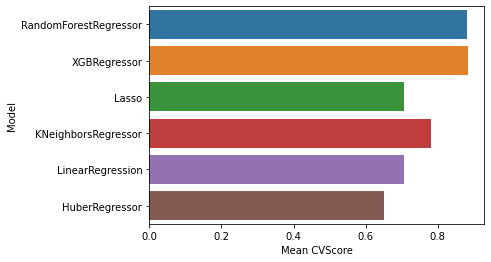

In [255]:
mean_df = pd.DataFrame({'Model':mds, 'Mean CVScore':mean_scores})
sns.barplot(data=mean_df,y='Model', x='Mean CVScore')
plt.show()

## Actual Vs Predicted

In [463]:
def actual_vs_predicted(model,data,y_true,title=None):
    pred = model.predict(data)
    apdf = pd.DataFrame({'Actual':y_true, 'Predicted':np.round(pred)})
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=apdf, x='Actual', y='Predicted') 
    plt.title(title)
    plt.show()

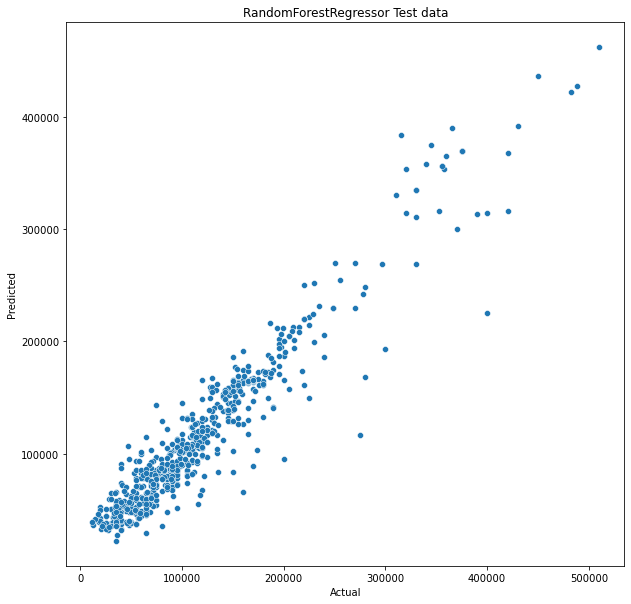

In [464]:
actual_vs_predicted(rfr_model,x_test, y_test, "RandomForestRegressor Test data")

## feaures importance

In [462]:
importance = rfr_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.00099
Feature: 1, Score: 0.00007
Feature: 2, Score: 0.00014
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00485
Feature: 6, Score: 0.00024
Feature: 7, Score: 0.00021
Feature: 8, Score: 0.00333
Feature: 9, Score: 0.00015
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00003
Feature: 12, Score: 0.00004
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00036
Feature: 17, Score: 0.00017
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00007
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00111
Feature: 25, Score: 0.00028
Feature: 26, Score: 0.00005
Feature: 27, Score: 0.00010
Feature: 28, Score: 0.00018
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00003
Feature: 31, Score: 0.00016
Feature: 32, Score: 0.00008
Feature: 33, Score: 0.00111
Feature: 34, Score: 0.00017
Feature: 35, Score: 0.00019
Fe

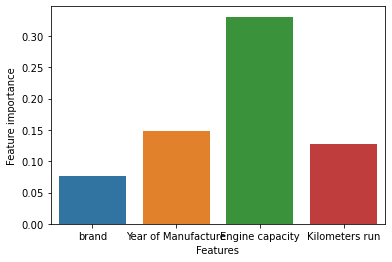

In [3]:
arr = ['brand','Year of Manufacture','Engine capacity','Kilometers run']
feat = [0.07700,0.14827,0.33087,0.12755]
mean_df = pd.DataFrame({'Features':arr, 'Feature importance':feat})
sns.barplot(data=mean_df,x='Features', y='Feature importance')
plt.show()